In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Linear function without noise')

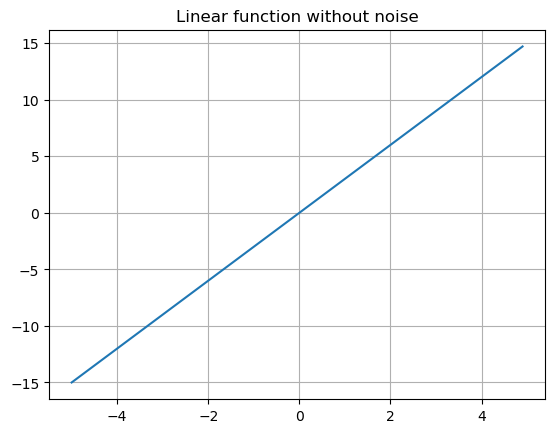

In [2]:
# generate X axis independent points
X = torch.arange(-5,5,0.1).view(-1,1)
# random number
some_random_slope_scalar = 3
#generate linear function
Y_no_noise = some_random_slope_scalar*X

#plot
plt.plot(X,Y_no_noise)
plt.grid()
plt.title("Linear function without noise")


Text(0.5, 1.0, 'Linear function with noise')

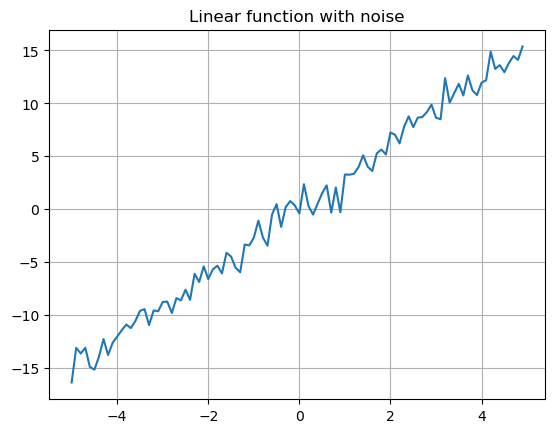

In [3]:
# additive noise is added (Normal Distribution)
Y = Y_no_noise + torch.randn(X.size())

#plot
plt.plot(X,Y)
plt.grid()
plt.title("Linear function with noise")

In [4]:
# forward pass = prediction
def forward(x):
    return w*x+b


In [5]:
#MSE loss functions ['/2' is there for easier differentiation]
def loss_fn(y_hat,y):
    return torch.mean((y_hat-y)**2/2)

In [6]:
#some random initialization of two variables. weight and bias
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

In [7]:
lr = 0.1 #learning rate
loss_list = [] #empty list to store loss
iter = 20 # no. of iters per epoch = 20

In [8]:
#training loop
print('Index \tLoss \t\t\tWeight (slope) \t\tBias (y-intercept) ')
for i in range(iter):
    Y_pred = forward(X) #predicted outputs shape = [100,1]
    loss = loss_fn(Y_pred,Y) # MSE loss calculated
    loss_list.append(loss.item()) # stored in a list
    loss.backward() #backpropagation 
    # calculates gradients of loss w.r.t. parameters (weight and bias)
    w.data = w.data - lr*w.grad.data # weight changes incrementally
    b.data = b.data - lr*b.grad.data # same thing with bias
    w.grad.data.zero_() # pytorch does not automatically clear the gradient
    b.grad.data.zero_() # so have to do that ourselves
    
    # some printing
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

Index 	Loss 			Weight (slope) 		Bias (y-intercept) 
0, 	900.39404296875, 	0.7908773422241211, 	-18.05801010131836
1, 	184.3646240234375, 	2.597269058227539, 	-16.256263732910156
2, 	134.33041381835938, 	2.9070420265197754, 	-14.62566089630127
3, 	108.48625183105469, 	2.9667723178863525, 	-13.156569480895996
4, 	87.95787811279297, 	2.984062910079956, 	-11.834088325500488
5, 	71.33990478515625, 	2.99355411529541, 	-10.643769264221191
6, 	57.8786506652832, 	3.0010859966278076, 	-9.572434425354004
7, 	46.97420883178711, 	3.0076968669891357, 	-8.608195304870605
8, 	38.14094543457031, 	3.0136187076568604, 	-7.740346908569336
9, 	30.985458374023438, 	3.0189437866210938, 	-6.959253787994385
10, 	25.189077377319336, 	3.023736000061035, 	-6.256243705749512
11, 	20.49365234375, 	3.0280489921569824, 	-5.623510360717773
12, 	16.6900691986084, 	3.031930685043335, 	-5.0540289878845215
13, 	13.60893440246582, 	3.0354244709014893, 	-4.541476249694824
14, 	11.113025665283203, 	3.0385689735412598, 	-4.08

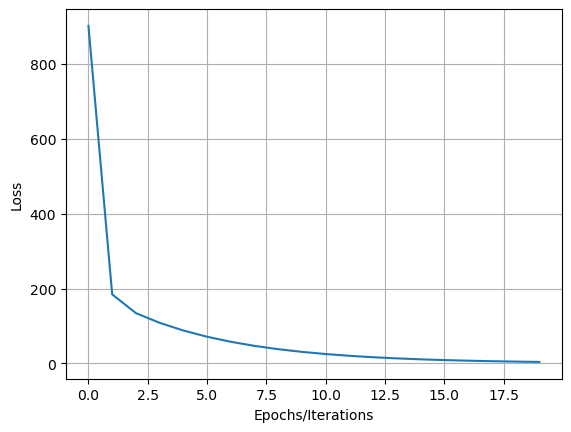

In [9]:
#some plotting script
plt.plot(loss_list), plt.grid()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()